In [36]:
import pandas as pd #provides support for multi-dimensional arrays.
import seaborn as sns #this plots the library in a more uncluttered way.
import numpy as np #used for working with arrays.
import matplotlib.pyplot as plt #it supports the way seaborn makes it more organized.
import statistics
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression #To see the relation among variables. 



In [4]:
df1 = pd.read_csv("steps.csv", delimiter=";")#sequence of one or more characters used to specify the boundary between separate, independent regions in plain text or other data streams.
print(df1)

df2 = pd.read_csv("survey.csv")
print(df2)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  

In [5]:
#merge the data
df = pd.merge(df1, df2, on = "id") #used to return the identity of an object



#clean the data
#print(df["gender"].describe()) #returns description of the data in the DataFrame.
#print(df.sort_values(by="gender", ascending = True))#sorts a data frame in Ascending or Descending order of passed Column
#print(df.loc[:,"gender"])
#print(statistics.mean([1, 2, 3, 4, 5])) #method calculates the mean (average) of the given data set.
#df.head() #displays the first five rows of the dataframe by default

#remove all the NANS
df = df.fillna(0)

df = df[(df["weight"] < 156) & (df["weight"] > 35)]

dfdaan = df

print(df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1      2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2      3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        0.0        0.0        0.0        0.0        0.0        0.0   
4      5        0.0        0.0        0.0        0.0        0.0        0.0   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        0.0     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        0.0        0.0        0.0        0.0        0.0        0.0   
926  927        0.0        0.0        0.0     1623.0        0.0        0.0   
927  928        0.0        0.0    14411.0    14364.0    26629.0    13092.0   
928  929        0.0     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  12-5-2014  13-5-2014

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1      2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2      3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        0.0        0.0        0.0        0.0        0.0        0.0   
4      5        0.0        0.0        0.0        0.0        0.0        0.0   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        0.0     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        0.0        0.0        0.0        0.0        0.0        0.0   
926  927        0.0        0.0        0.0     1623.0        0.0        0.0   
927  928        0.0        0.0    14411.0    14364.0    26629.0    13092.0   
928  929        0.0     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  12-5-2014  13-5-2014

In [6]:
#msp = df.loc[:,"20-6-2013":].mean(numeric_only=True).round()
#df["msp"] = msp

#first_column = df.pop("msp")
#df.insert(0, "msp", first_column)

#df.head


# Select the first date row in the dataframe, use axis=1 in .mean() to calculate the mean steps of each user over all measured days.
meanStepsPerParticipant = df.loc[:,"20-6-2013":].mean(axis=1).round()
df["Mean_steps_per_participant"] = meanStepsPerParticipant

first_column = df.pop("Mean_steps_per_participant")
df.insert(0, "Mean_steps_per_participant", first_column)

# print(meanStepsPerParticipant)

# Show the first five.
# print(df)
df.head()

/var/folders/6l/6jgy2k557y97j1p61m03zlg80000gn/T/ipykernel_12736/164296082.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meanStepsPerParticipant = df.loc[:,"20-6-2013":].mean(axis=1).round()


,Mean_steps_per_participant,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,5073.0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2793.0,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3702.0,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,220.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,865.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


/Users/rembrandtvanderheyden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


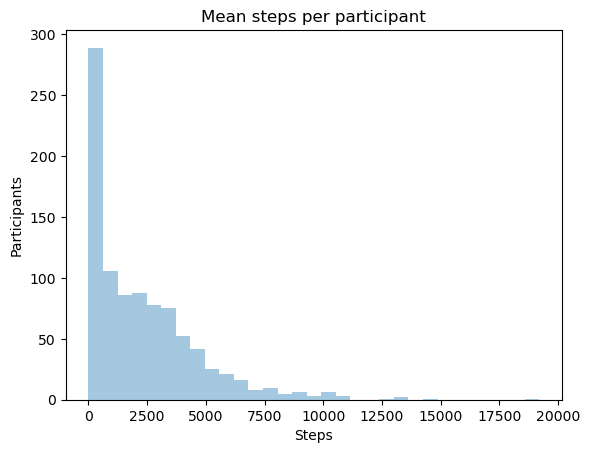

In [7]:
sns.distplot(meanStepsPerParticipant, kde=False)
plt.title("Mean steps per participant")
plt.xlabel("Steps")
plt.ylabel("Participants")
plt.show()

The median steps are: 1640.5 steps
The mean steps are: 2319.930735930736 steps
The standard deviation steps are: 2383.495441365898 steps


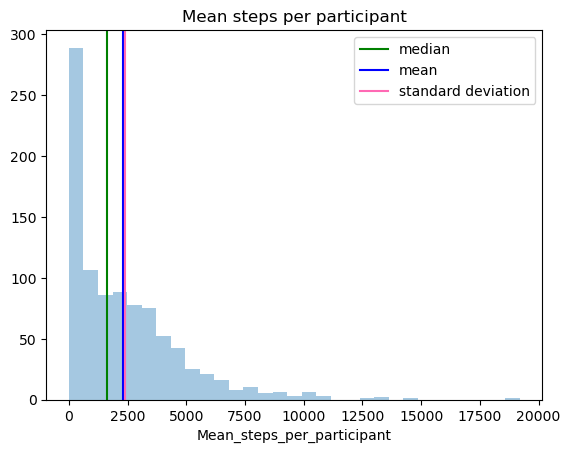

In [8]:
mean_steps = df["Mean_steps_per_participant"].mean()
median_steps = df["Mean_steps_per_participant"].median()
standardDeviation = np.std(df["Mean_steps_per_participant"])

print(f'The median steps are: {median_steps} steps')
print(f'The mean steps are: {mean_steps} steps')
print(f'The standard deviation steps are: {standardDeviation} steps')

sns.distplot(df["Mean_steps_per_participant"], kde=False)
plt.title("Mean steps per participant")
plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')
plt.axvline(standardDeviation, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()

# The plot above counts the steps per participant


* Normality: All steps are above 0.
* Variation: Most steps are below 1000, a reasonable part between 1000 and 5000 and a smalt part between 7500 and 12.500.
* Modality: There is one big peak and 18 smaller peaks.
* Skewness: Overall positive.
* Outliners: A few outliners are presented outside the wiskers of the boxplot. 

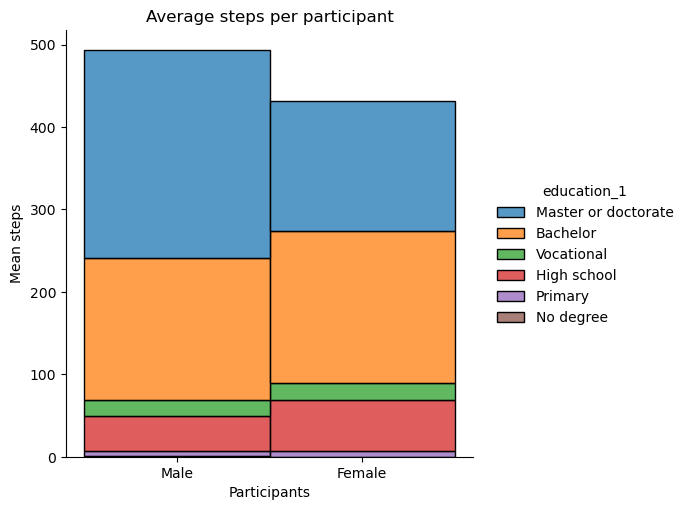

In [9]:

#sns.histplot(y="Mean_steps_per_participant", x="gender", hue="education_1", data=df)

sns.displot(data=df, x="gender", hue="education_1", multiple="stack")
plt.title('Average steps per participant')
plt.ylabel('Mean steps')
plt.xlabel('Participants')
plt.show()

# Information plot above: Average steps per participant
* The majority of the male with a master or doctorate took the most steps. On the other hand, female with only primary education showed the most steps.
* Male peaks at Bachelor en Master or Doctorate. Female peak at High school and Primary school. 

* Over all the peaks of male and female with master or doctorate, bachelor and vactional are almost the same. Interesting is the big difference in peak between male and female that just did primary school. Finally, male without education take an astonishing number of steps compared to female.


In [10]:
from sklearn.linear_model import LinearRegression
import pandas as pd

participantWeight = df["weight"]
df["height"] = df["height"] / 100
participantHeight = df["height"]

df["BMI"] = participantWeight / (participantHeight * participantHeight)
df["BMI"].describe()

# Remove infinite BMI
df = df[df["BMI"] < 60]

print(df["BMI"])



0      30.930438
1      23.765432
2      25.617284
3      25.249337
4      21.872423
         ...    
924    21.671258
925    24.414062
926    21.672110
927    21.971336
928    23.456790
Name: BMI, Length: 922, dtype: float64


     Mean_steps_per_participant   id  20-6-2013  21-6-2013  22-6-2013  \
0                        5073.0    1        0.0        0.0        0.0   
1                        2793.0    2        0.0        0.0    10473.0   
2                        3702.0    3        0.0    11428.0    12523.0   
3                         220.0    4        0.0        0.0        0.0   
4                         865.0    5        0.0        0.0        0.0   
..                          ...  ...        ...        ...        ...   
924                      1723.0  925        0.0     4571.0    10471.0   
925                       724.0  926        0.0        0.0        0.0   
926                      6194.0  927        0.0        0.0        0.0   
927                      3826.0  928        0.0        0.0    14411.0   
928                      3131.0  929        0.0     3324.0     4507.0   

     23-6-2013  24-6-2013  25-6-2013  26-6-2013  27-6-2013  ...  13-5-2014  \
0          0.0     3941.0    15733.0     9929

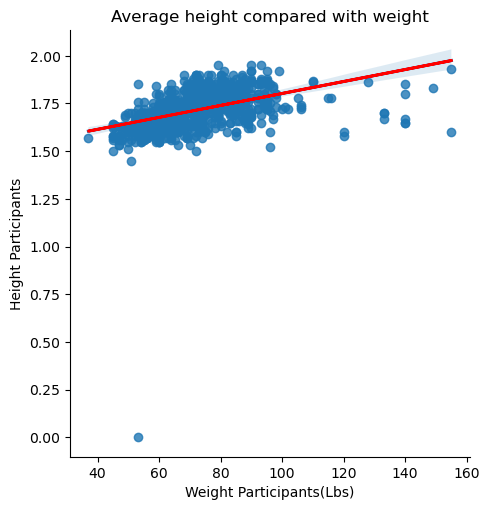

In [51]:
import seaborn as sns

#volgensmij klopt het niet, vreemde cijfering van de tabel. Ik snap ook niet zo goed hoe ik het kan omzetten naar 
#kg of pounds en hoe ik dat in de tabel kan aanpassen. 



x = dfdaan[['weight']]
y = dfdaan["height"]
lm = LinearRegression() #LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
lm.fit(x,y)

print(dfdaan)

b0 = lm.intercept_
b1 = lm.coef_[0]

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}x") #Where is the f for? 

dfdaan["heightpredict"] = lm.predict(x)

#https://realpython.com/linear-regression-in-python/

print(dfdaan)

sns.lmplot(x="weight", y="height", fit_reg=True, data=dfdaan) 
#plt.xlim(0, 200) ##Hoe kan ik dit doen?
#plt.ylim(0, 100) #Hoe kan ik dit doen?
plt.plot(dfdaan['weight'],dfdaan['heightpredict'], color="red", lw=2) #Heb het gemaakt aan de hand van college van joost, maar ik snap het niet helemaal
plt.xlabel("Weight Participants(Lbs)")
plt.ylabel("Height Participants")
plt.title("Average height compared with weight")
plt.show()

## Linear Regression


* Its one of the most simplest regression methods.
* In a linear regression model you can discover relationships between features.
* With linear regression you always predict numerical values.
* With the linear regression you can check assumptions.

In [34]:
import pandas as pd
dummies = pd.get_dummies(df['age']) #a dummy variable (or column) is one which has a value of one (1) when a categorical event occurs (e.g., an individual is male) and zero (0) when it doesn’t occur (e.g., an individual is female).
pd.get_dummies(df['age'])
df = pd.concat([df, dummies], axis=1)
df.head()


,Mean_steps_per_participant,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,...,133.0,140.0,149.0,155.0,25-34,35-44,45-54,55-64,65+,<25
0,5073.0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,...,0,0,0,0,1,0,0,0,0,0
1,2793.0,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,...,0,0,0,0,0,1,0,0,0,0
2,3702.0,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,...,0,0,0,0,1,0,0,0,0,0
3,220.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,865.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


## Evaluate the model on the test data
* There is a clear correlation between the weight and the height of the participants.
* Larger participants generally weigh more than small participants.
* There are few real outliers to be seen.

In [38]:
import math
y_actual = [1,2,3,4,5]
y_predicted = [1.6,2.5,2.9,3,4.1]
 
MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


# the difference between the observed and predicted values is called the residual. 
#The mean squared error (MSE) is the average of all the squared residuals. 
#Then the RMSE just takes the square root of that, which puts the metric back in the response variable scale.

Root Mean Square Error:

0.6971370023173351


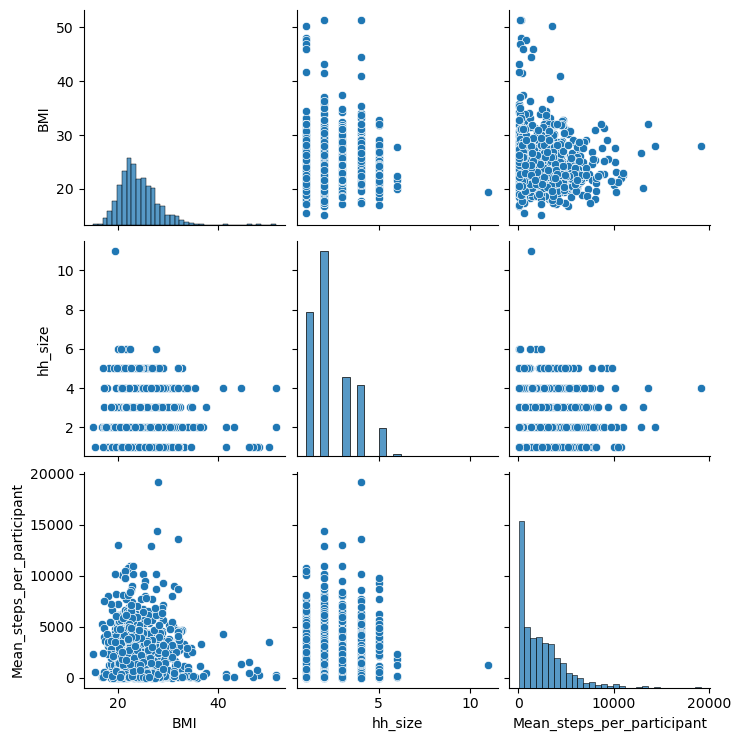

In [11]:
subsetColumns = df[["BMI", "hh_size", "Mean_steps_per_participant"]] #hh_size dataframe with individuals and their household IDs and I would like to create a variable that contains the household size.
sns.pairplot(subsetColumns)
plt.show()

## Discription about the plot
* According to these subset columns there is a correlation between the BMI, hh_size and the Mean_steps_per_participant.
* In general, there is a correlation between the number of steps and the BMI. The more steps, the lower the BMI.
* There is a colleration between the hh_size and Mean_steps_per_participant. Multiple outliniers are present. 

In [12]:
corr = df[["BMI", "hh_size", "Mean_steps_per_participant"]].corr() #corrr is a package for exploring correlations in R. It focuses on creating and working with data frames of correlations (instead of matrices)
corr

,BMI,hh_size,Mean_steps_per_participant
BMI,1.000000,0.031850,-0.054801
hh_size,0.031850,1.000000,0.038253
Mean_steps_per_participant,-0.054801,0.038253,1.000000


## Results of the correlation between hight, BMI and mean steps per participant
* There is a low significance between hh_size and the BMI.
* There is a weak significance between Means_steps_per_participant and the hh_size.
* There is a moderate significance between BMI and Mean_steps_per_participant. 


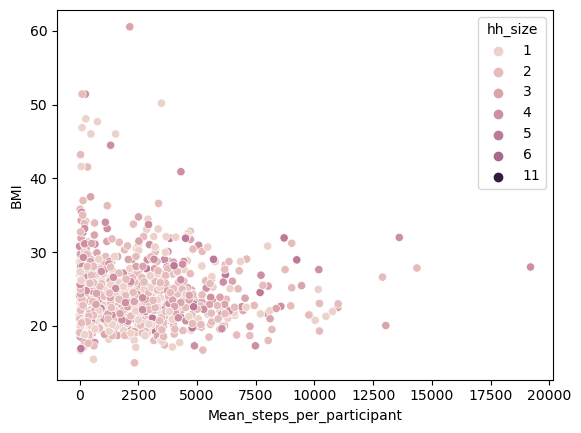

In [62]:
sns.scatterplot(
    data=dfdaan, x="Mean_steps_per_participant", y="BMI", hue="hh_size", legend="full") #https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot
plt.show()

In [ ]:
#Hier word je toch niet echt wijzer van?--------

/Users/rembrandtvanderheyden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


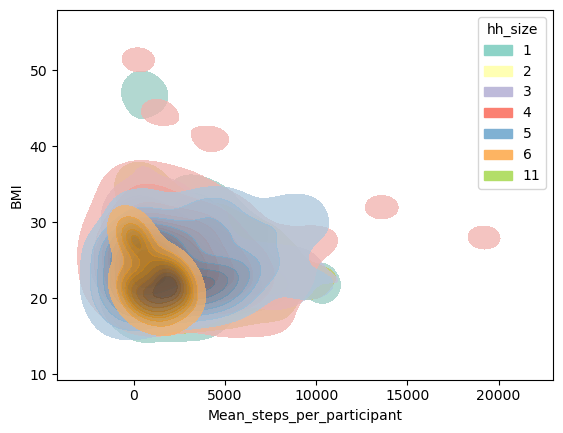

In [60]:
sns.kdeplot(
    data=df, x="Mean_steps_per_participant", y="BMI", hue="hh_size",  fill=True, common_norm=False, palette="Set3", alpha=.75
)
plt.show()

#Door de sets te veranderen kun je meerdere lagen van de plot zien. 

## The results of the plot above
* The vast majority of participants with an hh_size of 6 took a low number of steps
* Participants with hh_size of 4 generally took the most steps.
* Participants with an hh_size of 5 and 1 generally took the same number of steps. However, some outliers can be seen



In [ ]:
#Accurate is possible but never 100%

LinearRegression()